<a href="https://colab.research.google.com/github/Seojun-AK/opencv-kdt/blob/main/opencv_image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 환경구성

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/opencv

/content/drive/MyDrive/Colab Notebooks/opencv


In [ ]:
!pip install simpleitk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 2.0 MB/s 


In [ ]:
!git clone https://github.com/Seojun-AK/opencv-kdt.git

fatal: destination path 'opencv-kdt' already exists and is not an empty directory.


In [ ]:
import SimpleITK as sitk
from skimage.transform import rotate
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing import image as kimg
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,20)
plt.rcParams['lines.linewidth'] = 4

### Sample image 불러오기

In [ ]:
ori_img = sitk.ReadImage('./opencv-kdt/dataset/data.nii.gz')
sample = sitk.GetArrayFromImage(ori_img)
# sample.shape
sample[40].shape

(512, 512)

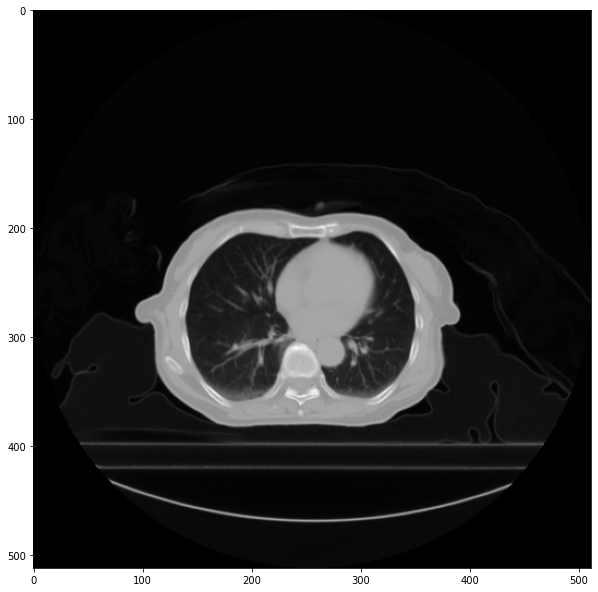

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(sample[40], cmap='gray')

### matplotlib image save

In [ ]:
import matplotlib.image as mpimg

In [ ]:
sample_img = sample[40]

In [ ]:
mpimg.imsave( 'sample_mpimg2.png', sample_img)

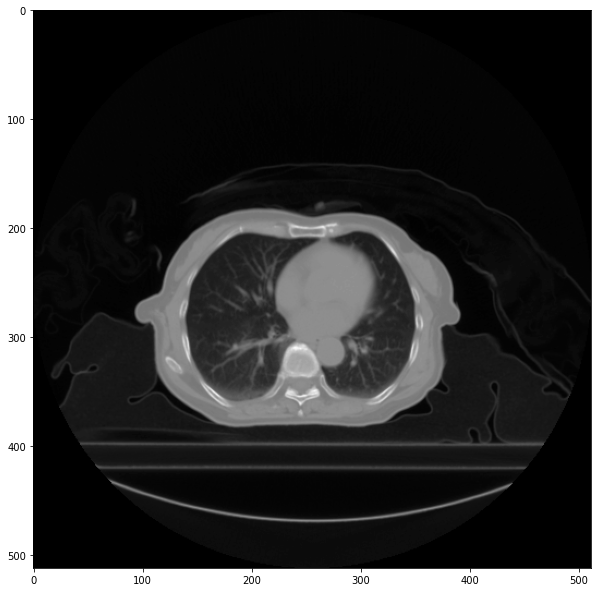

In [ ]:
sample_load = cv2.imread('sample_mpimg2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(sample_load, cmap='gray')

### opencv 실습

In [ ]:
norm_img = (sample_load - np.min(sample_img)) / (np.max(sample_img) - np.min(sample_img))
norm_img

array([[0.64425428, 0.64425428, 0.64425428, ..., 0.64425428, 0.64425428,
        0.64425428],
       [0.64425428, 0.64425428, 0.64425428, ..., 0.64425428, 0.64425428,
        0.64425428],
       [0.64425428, 0.64425428, 0.64425428, ..., 0.64425428, 0.64425428,
        0.64425428],
       ...,
       [0.64425428, 0.64425428, 0.64425428, ..., 0.64425428, 0.64425428,
        0.64425428],
       [0.64425428, 0.64425428, 0.64425428, ..., 0.64425428, 0.64425428,
        0.64425428],
       [0.64425428, 0.64425428, 0.64425428, ..., 0.64425428, 0.64425428,
        0.64425428]])

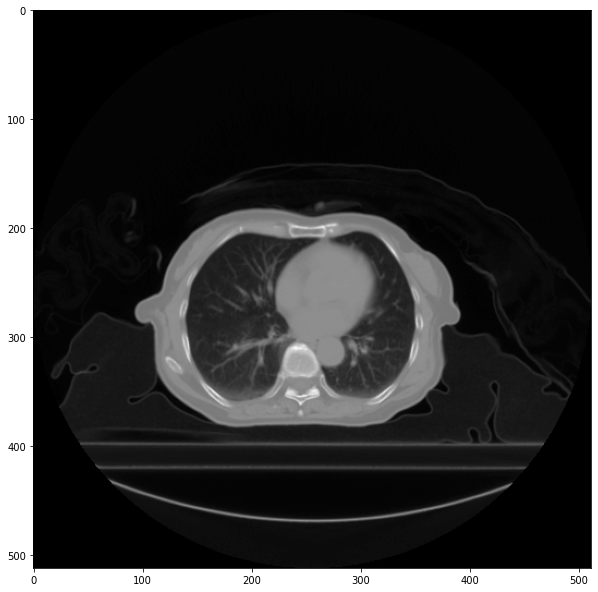

In [ ]:
plt.imshow(norm_img, cmap='gray')

### Blur

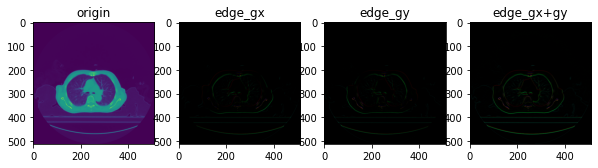

In [ ]:
test = cv2.imread('sample_mpimg.png')

gx_kernel = np.array([[1, 0], [0, -1]])
gy_kernel = np.array([[0, 1], [-1, 0]])

edge_gx = cv2.filter2D(test, -1, gx_kernel)
edge_gy = cv2.filter2D(test, -1, gy_kernel)

imgs = {'origin':test, 'edge_gx':edge_gx, 'edge_gy':edge_gy, 'edge_gx+gy':edge_gx+edge_gy}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1, 4, i+1)
    plt.title(k)
    plt.imshow(v[:,:,(2,1,0)])

### Sobel, Laplacian Gradient

##### Sobel Gradient

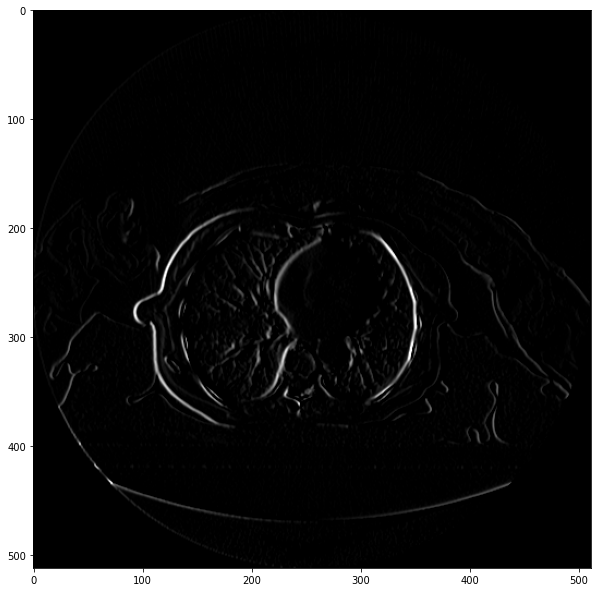

In [ ]:
def sobelx_edge_detection(input_img):
    img = cv2.imread(input_img, cv2.IMREAD_GRAYSCALE)
    sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3)
    plt.imshow(sobelx,cmap = 'gray')

sobelx_edge_detection('sample_mpimg2.png')

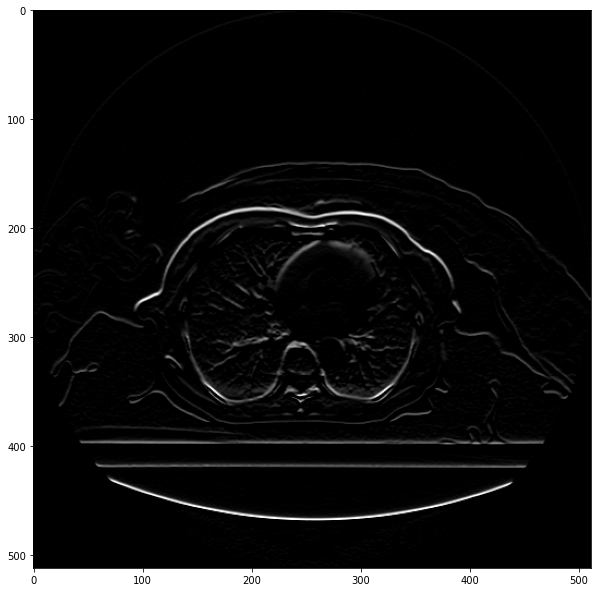

In [ ]:
def sobely_edge_detection(input_img):
    img = cv2.imread(input_img, cv2.IMREAD_GRAYSCALE)
    sobely = cv2.Sobel(img, -1, 0, 1, ksize=3)
    plt.imshow(sobely,cmap = 'gray')

sobely_edge_detection('sample_mpimg2.png')

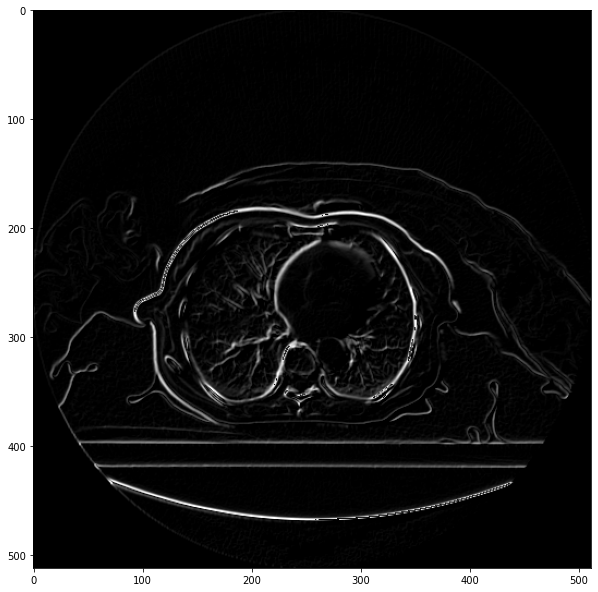

In [ ]:
def sobel_edge_detection(input_img):
    img = cv2.imread(input_img, cv2.IMREAD_GRAYSCALE)
    # img = cv2.GaussianBlur(img, (11, 11), 0)

    sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, -1, 0, 1, ksize=3)
    sobel = sobelx + sobely
    plt.imshow(sobel,cmap = 'gray')

sobel_edge_detection('sample_mpimg2.png')

##### Laplacian Gradient

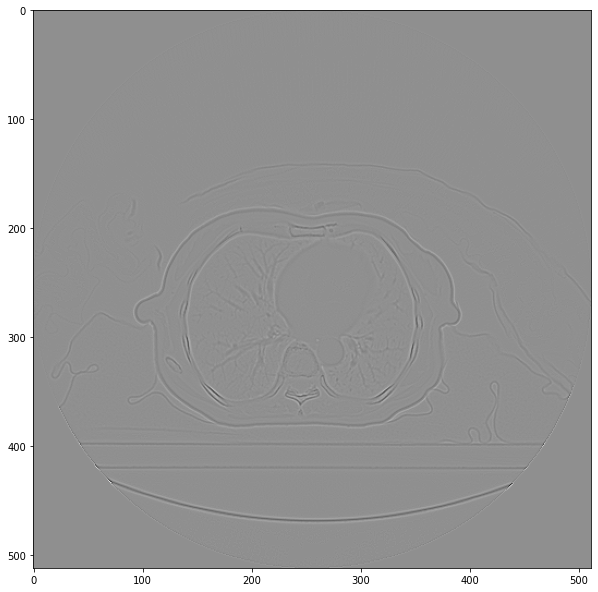

In [ ]:
# laplacian default ksize
# sample2 = cv2.imread('sample_mpimg2.png', cv2.IMREAD_GRAYSCALE)
laplacian1 = cv2.Laplacian(norm_img, -1)

plt.imshow(laplacian1,cmap='gray')

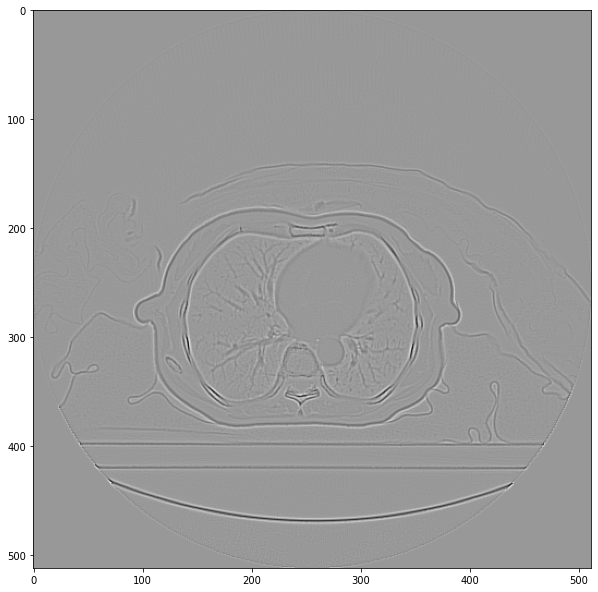

In [ ]:
# laplacian default ksize
# sample2 = cv2.imread('sample_mpimg2.png', cv2.IMREAD_GRAYSCALE)
laplacian3 = cv2.Laplacian(norm_img, -1, ksize=3)

plt.imshow(laplacian3, cmap='gray')

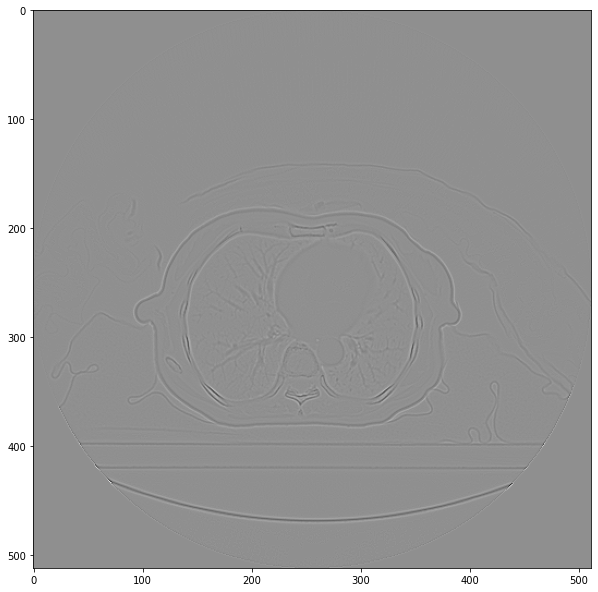

In [ ]:
#numpy customize filter
la_filter4 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
la_filter8 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

laplacian4 = cv2.filter2D(norm_img, -1, la_filter4)
plt.imshow(laplacian4, cmap='gray')

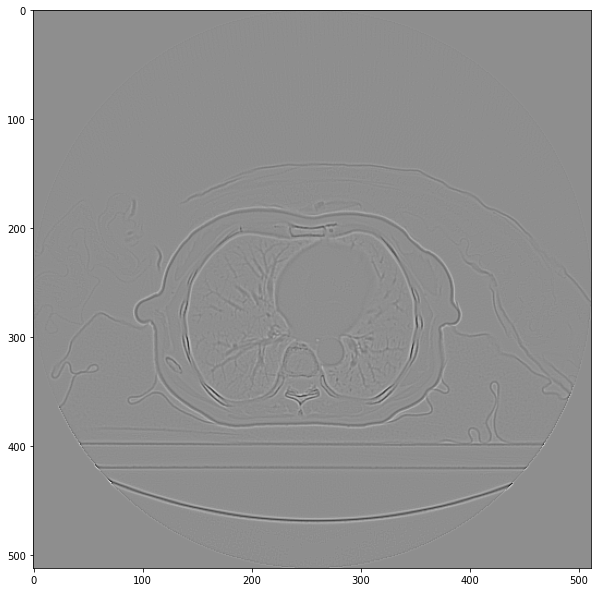

In [ ]:
laplacian8 = cv2.filter2D(norm_img, -1, la_filter8)
plt.imshow(laplacian8, cmap='gray')

### Canny Edge Detection
- Canny Edge Detection  
&nbsp;&nbsp; 1. 노이즈 제거  
                - 5x5 가우시안 필터
&nbsp;&nbsp; 2. Gradient  
                - Sobel Kernel 수평, 수직방향으로 적용
                - Gradient의 방향은 Edge에 수직 방향
&nbsp;&nbsp; 3. fixel값 0으로 변환  
                - Edge에 기여하지 않은 fixel을 제거하기 위해 이미지 전체 스캔
                - gradient의 최댓값을 가진 fixel 탐색
&nbsp;&nbsp; 4. Hyteresis Thresholding  
                - 3단계를 거친 결과가 실제 edge인지 판단
                - minVal ~ maxVal의 경계값을 설정 후 사이에 있을 경우 연결구조를 확인 후 edge인지 판단

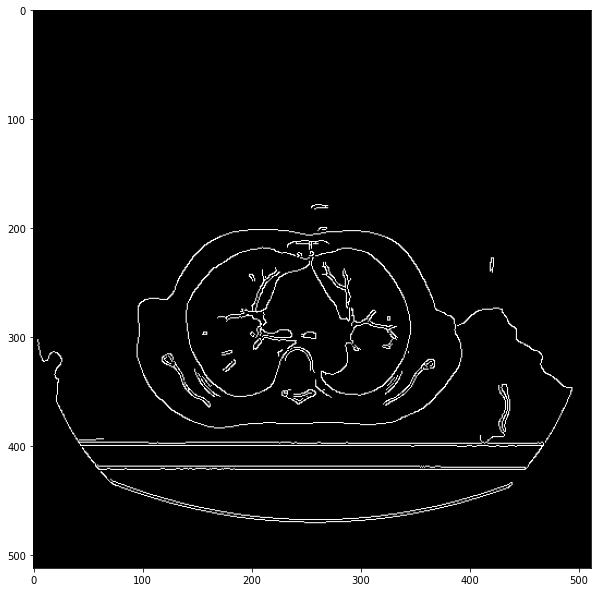

In [ ]:
img = cv2.imread('sample_mpimg.png',)

edge1 = cv2.Canny(img, 50, 200)
edge1 = cv2.cvtColor(edge1, cv2.COLOR_GRAY2BGR)

edge2 = cv2.Canny(img, 100, 200)
edge2 = cv2.cvtColor(edge2, cv2.COLOR_GRAY2BGR)

edge3 = cv2.Canny(img, 170, 200)
edge3 = cv2.cvtColor(edge3, cv2.COLOR_GRAY2BGR)


plt.imshow(edge1,)

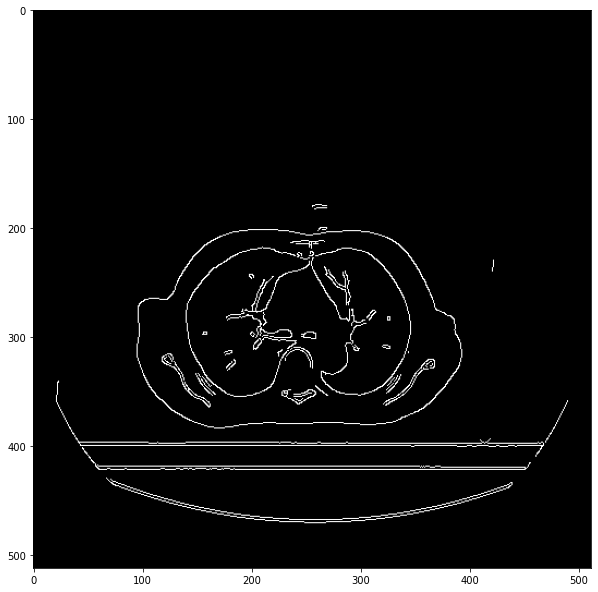

In [ ]:
plt.imshow(edge2,)

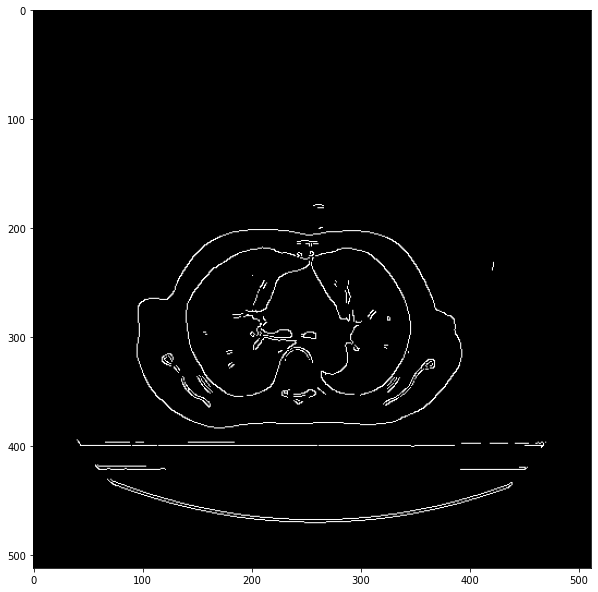

In [ ]:
plt.imshow(edge3,)

### Canny Edge Detection Practice

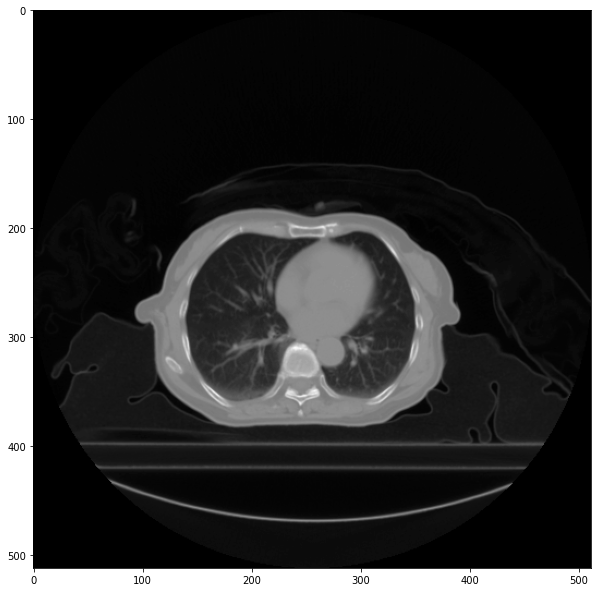

In [ ]:
sample2 = cv2.imread('sample_mpimg2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(sample2, cmap='gray')

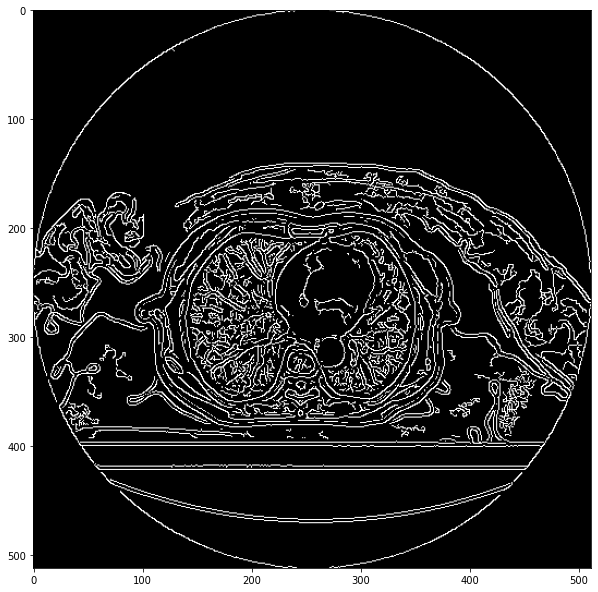

In [ ]:
canny1 = cv2.Canny(sample2, threshold1 = 50, threshold2 = 200, apertureSize=5,)
plt.imshow(canny1,cmap='gray')

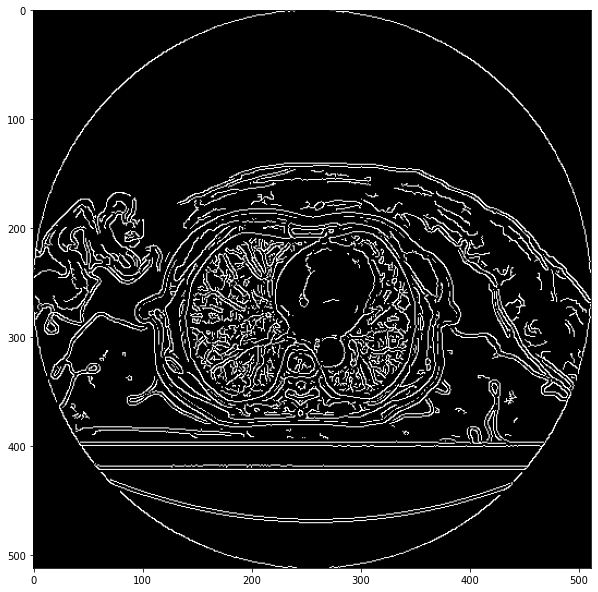

In [ ]:
canny2 = cv2.Canny(sample2, threshold1=100, threshold2=200, apertureSize=5)
plt.imshow(canny2, cmap='gray')

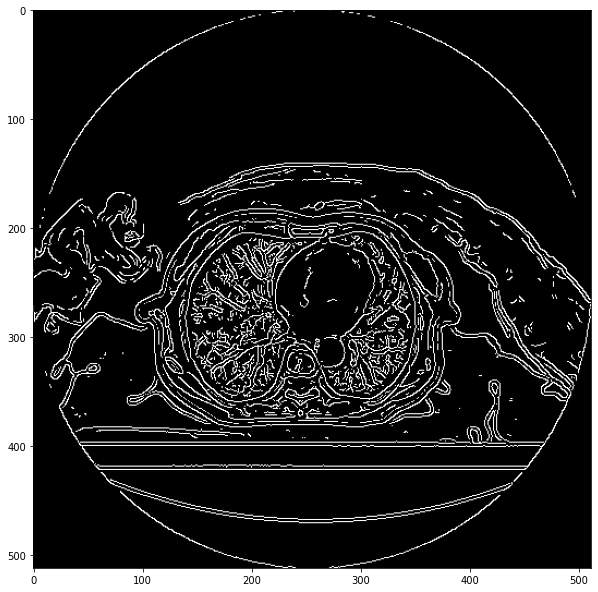

In [ ]:
canny3 = cv2.Canny(sample2, threshold1=170, threshold2=200, apertureSize=5)
plt.imshow(canny3, cmap='gray')

## Image Pyramid processing
#### 이미지의 해상도를 다단계로 만들어 각 단계에서 탐색 ⟹ 이미지 피라미드  
&nbsp;&nbsp; - 가우시안 피라미드  
&nbsp;&nbsp; - 라플라시안 피라미드

- 가우시안 피라미드  
        downsampling : 해상도가 낮은 이미지를 생성  
            - 이미지의 짝수열, 짝수행에 해당하는 픽셀을 제거하여 이미지 해상도를 줄임
            - M x N 이미지는 M/2 x N/2 해상도로 변환
        upsampling : 해상도가 높은 이미지를 생성  
            - 이미지의 짝수열, 짝수행에 픽셀을 추가하여 하위 단계 이미지 생성
            - blur 효과를 낸 듯한 이미지로 생성 → 이미지 정보가 제대로 복원되지 않기 때문
                ⟹ 이를 해소하기 위해 Super Resolution 기법 사용
  
- 라플라시안 피라미드  
        가우시안 피라미드의 결과로 생성  
        원본 이미지를 가우시안 피라미드 상위 단계 이미지2 생성  
            ⟹ 가우시안 피라미드 하위 단계 이미지3으로 생성
            ⟹ 원본 이미지와 이미지3의 해상도가 같으나 이미지3은 제대로 복구되지 않은 이미지
            ⟹ 라플라시안 피라미드의 최하위 단계는 원본이미지 - 이미지3 을 연산함으로써 생성


    

### Gaussian & Laplacian

sample3 shape : (512, 512, 3)
lower shape : (256, 256, 3)


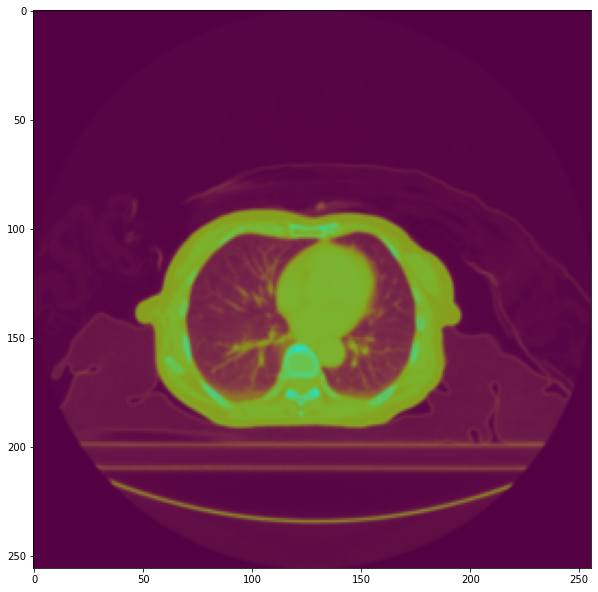

In [ ]:
# Gaussian Pyramids
sample3 = cv2.imread('sample_mpimg2.png')

lower_reso = cv2.pyrDown(sample3)
higher_reso = cv2.pyrUp(sample3)

print(f'sample3 shape : {sample3.shape}')
print(f'lower shape : {lower_reso.shape}')
plt.imshow(lower_reso, cmap='gray')

high shape : (1024, 1024, 3)


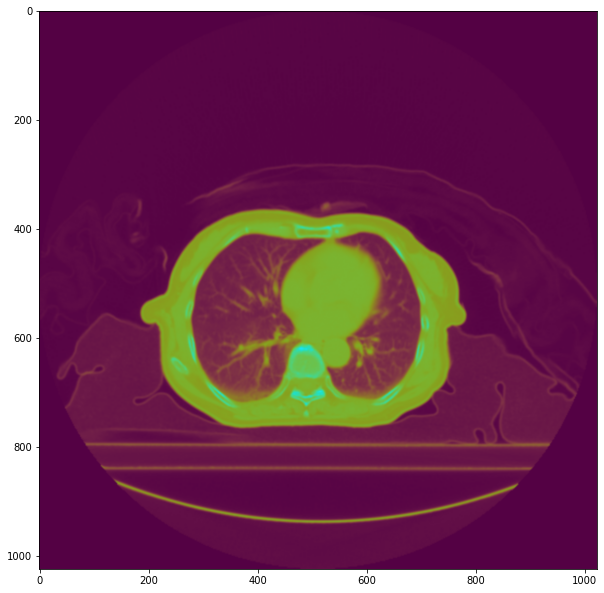

In [ ]:
print(f'high shape : {higher_reso.shape}')
plt.imshow(higher_reso, cmap='gray')

high2 shape : (512, 512, 3)


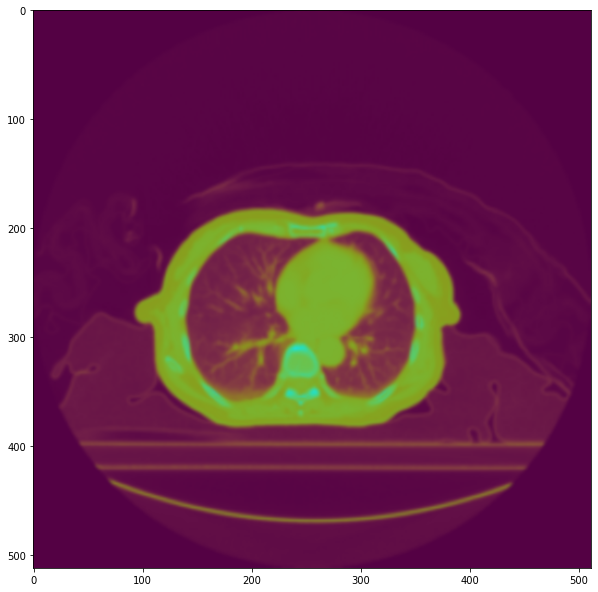

In [ ]:
higher_reso2 = cv2.pyrUp(lower_reso)
print(f'high2 shape : {higher_reso2.shape}')
plt.imshow(higher_reso2, cmap='gray')

In [ ]:
# laplacian after gaussian
sample3 = cv2.imread('sample_mpimg2.png')

lower_reso = cv2.pyrDown(sample3)
higher_reso = cv2.pyrUp(sample3)

print(f'sample3 shape : {sample3.shape}')
print(f'lower shape : {lower_reso.shape}')
print(f'high shape : {higher_reso.shape}')

sample3 shape : (512, 512, 3)
lower shape : (256, 256, 3)
high shape : (1024, 1024, 3)


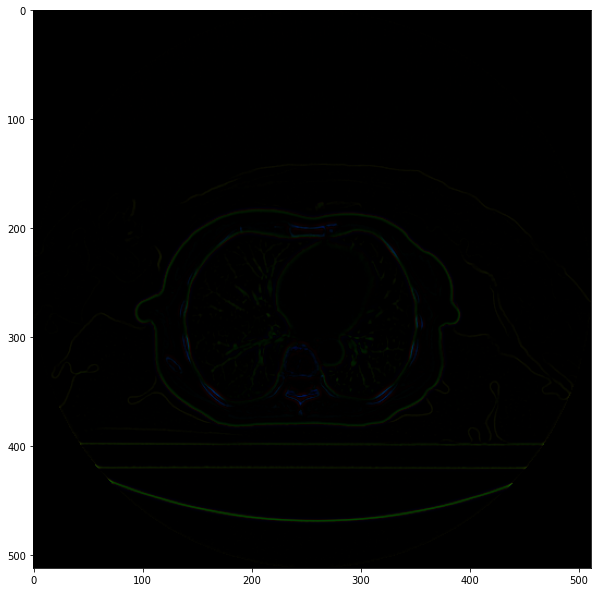

In [ ]:
sample3 = cv2.imread('sample_mpimg2.png')
GAD = cv2.pyrDown(sample3)
GAU = cv2.pyrUp(GAD)

temp = cv2.resize(GAU, (512, 512))
res = cv2.subtract(sample3, temp)

plt.imshow(res, cmap='gray')

### Corner Detection

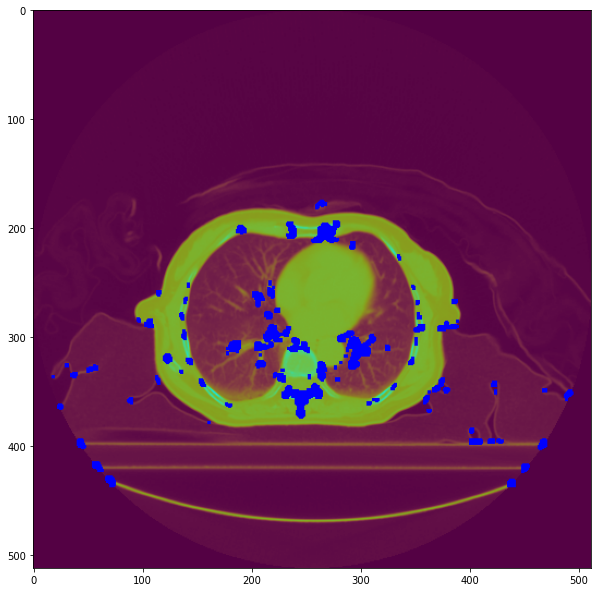

In [ ]:
sam_gray = cv2.cvtColor(sample3, cv2.COLOR_BGR2GRAY)
sam_gray = np.float32(sam_gray)

dst = cv2.cornerHarris(sam_gray, 5, 3, 0.04) # source, blocksize:window 크기, ksize:sobel시 사용되는 커널 크기,  

dst = cv2.dilate(dst, None)

sample3[dst>0.01*dst.max()] = [0, 0, 255]

plt.imshow(sample3)

### Watershed Image Segmentation
- Grayscale 이미지에서 픽셀값(0~255)의 분포도에서 값이 높은 값과 낮은 값으로 구성  
- 낮은 부분에서 다른색으로 채워가며 높은값들이 경계가 되어 이미지 분할  
    - 이미지 노이즈, 불규칙성의 경우 결과가 제대로 나타나지 않을 수 있음  
    - Marker-based watershed 알고리즘을 활용하여 해당 사항 보완  

##### Marker-based watershed
- 전경, 객체가 확실한 부분에 라벨링  
- 아닌 것이 확실한 부분에도 다른 라벨링  
- 모호한 곳은 0으로 라벨링

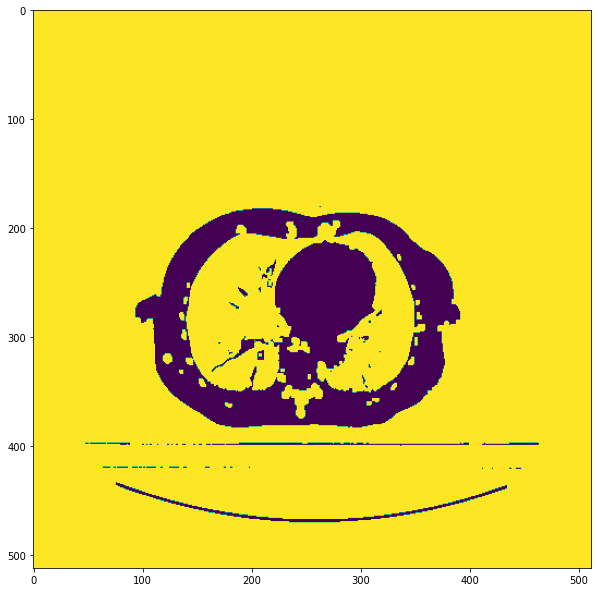

In [ ]:
sam_gray = cv2.cvtColor(sample3, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(sam_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thr)

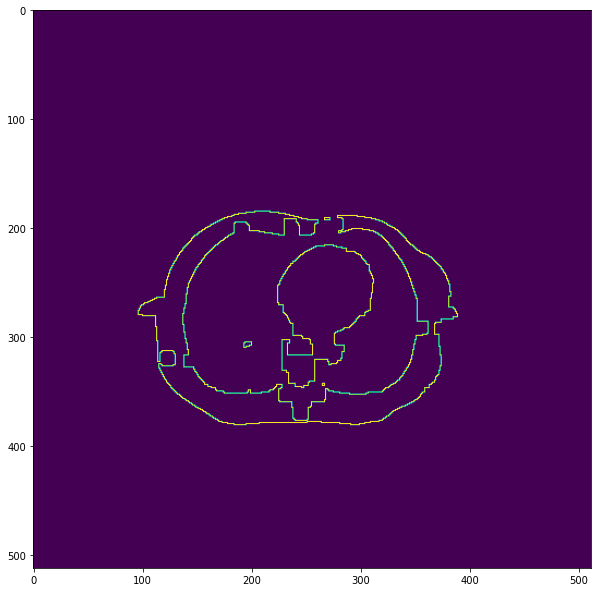

In [ ]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernel, iterations=2)

border = cv2.dilate(opening, kernel, iterations=3)
border = border - cv2.erode(border, None)
plt.imshow(border,)

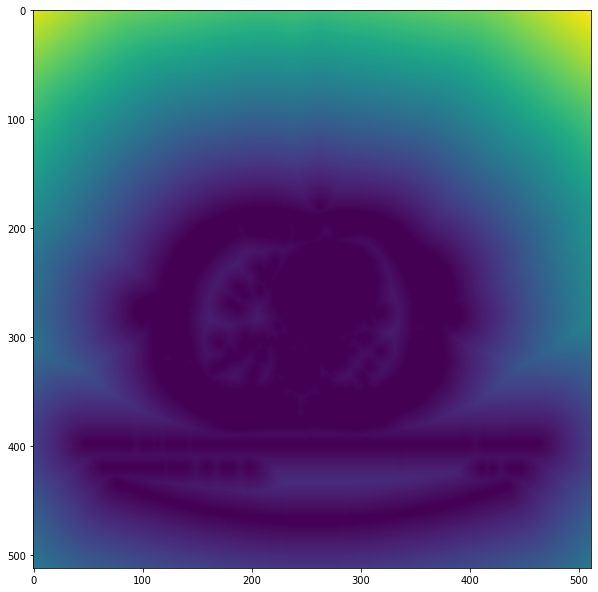

In [ ]:
dt = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
dt = ((dt-dt.min()) / (dt.max()-dt.min()) * 255).astype(np.uint8)
plt.imshow(dt)

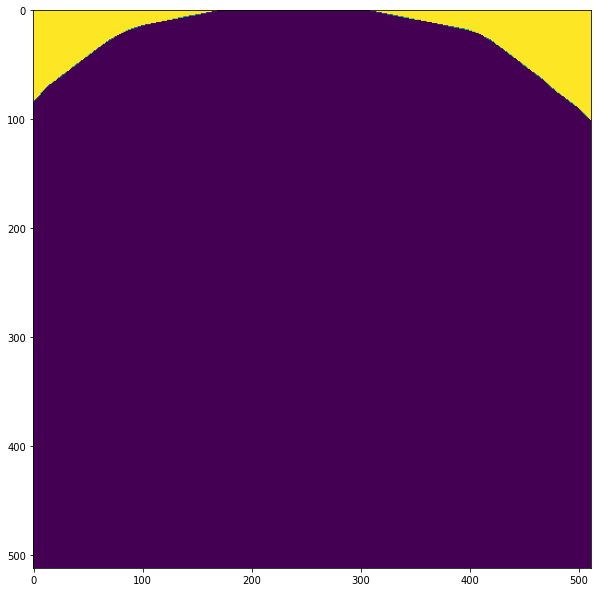

In [ ]:
ret, dt = cv2.threshold(dt, 180, 255, cv2.THRESH_BINARY)
plt.imshow(dt)

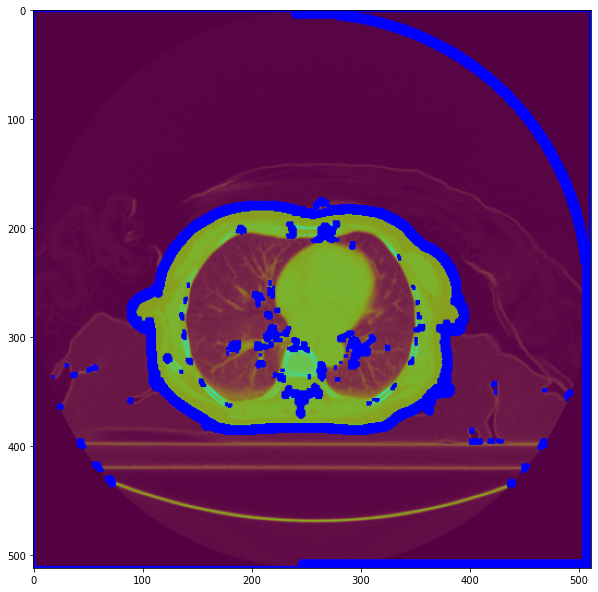

In [ ]:
from scipy.ndimage import label

marker, ncc = label(dt)
marker = marker*(255/ncc)

marker[border==255] = 255
marker = marker.astype(np.int32)
cv2.watershed(sample3, marker)

marker[marker==-1] = 0
marker = marker.astype(np.uint8)
marker = 255 - marker

marker[marker!=255] = 0
marker = cv2.dilate(marker, None)
sample3[marker==255] = (0, 0, 255)

plt.imshow(sample3,)

### SIFT
링크 대체  
https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_08_features/sift.ipynb#scrollTo=U5t-O70_ijRr

In [ ]:
sam_gray = cv2.cvtColor(sample3, cv2.COLOR_BGR2GRAY)
sam2, sam3 = None, None

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(sam_gray, None)

sam2 = cv2.drawKeypoints(sam_gray, kp, sam2)
sam3 = cv2.drawKeypoints(sam_gray, kp, sam3, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(sam2)

error: ignored

### Contour

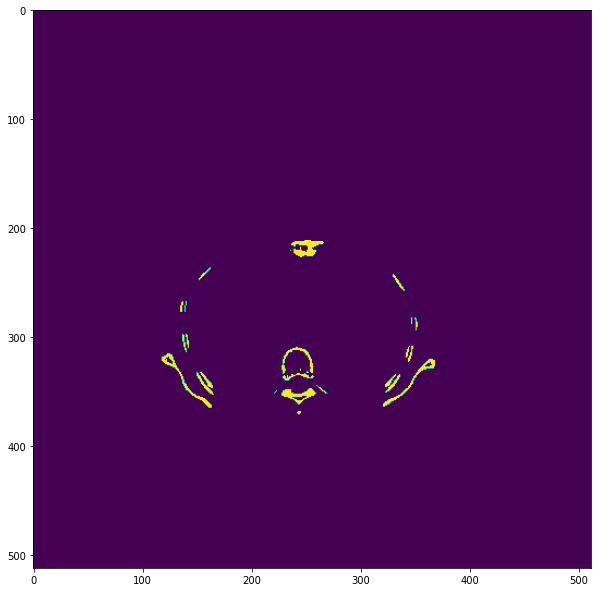

In [ ]:
img = cv2.imread('sample_mpimg.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thr = cv2.threshold(imgray, 127, 255, 0)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(imgray, contours, -1, (255, 0, 0), 1)

plt.imshow(thr,)



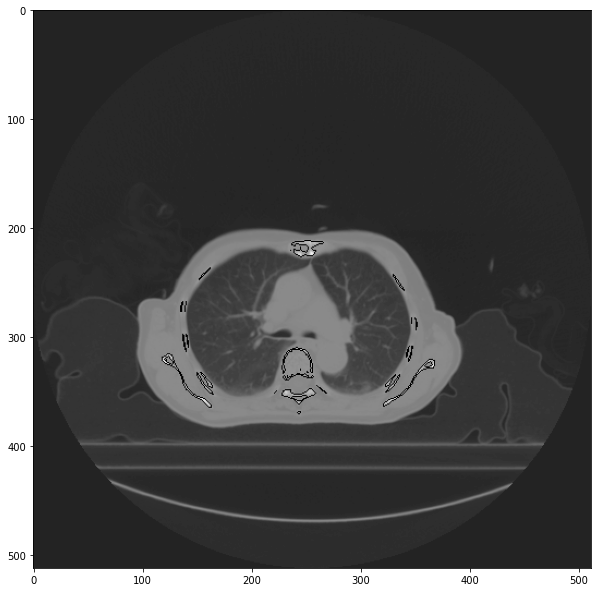

In [ ]:
plt.imshow(imgray, cmap='gray')

In [ ]:
def pyramid():
    img = cv2.imread('brain_test.jpg', cv2.IMREAD_GRAYSCALE)
    tmp = img.copy()

    titles = ['org','lv1','lv2','lv3']
    g_down = []
    g_down.append(tmp)

    for i in range(3):
        tmp1 = cv2.pyrDown(tmp)
        g_down.append(tmp1)
        tmp = tmp1

    for i in range(4):
        cv2_imshow(g_down[i])
        print(g_down[i].shape)

pyramid()

In [ ]:
def pyramid2():
    img = cv2.imread('brain_test.jpg', cv2.IMREAD_GRAYSCALE)
    tmp = img.copy()

    titles = ['org','lv1','lv2','lv3']
    g_down = []
    g_up = []

    g_down.append(tmp)

    for i in range(3):
        tmp1 = cv2.pyrDown(tmp)
        g_down.append(tmp1)
        tmp = tmp1
    
    # cv2_imshow(tmp)

    for i in range(3):
        tmp = g_down[i+1]
        tmp1 = cv2.pyrUp(tmp)
        g_up.append(tmp1)

    for i in range(3):
        # print(titles[3-i])
        cv2_imshow(g_up[i])
        print(g_up[i].shape)

pyramid2()

In [ ]:
def pyramid3():
    img = cv2.imread('brain_test.jpg', cv2.IMREAD_GRAYSCALE)
    tmp = img.copy()

    titles = ['org','lv1','lv2','lv3']
    g_down = []
    g_up = []
    img_shape = []

    g_down.append(tmp)
    img_shape.append(tmp.shape)

    for i in range(3):
        tmp1 = cv2.pyrDown(tmp)
        g_down.append(tmp1)
        img_shape.append(tmp1.shape)
        tmp = tmp1
    
    for i in range(3):
        tmp = g_down[i+1]
        tmp1 = cv2.pyrUp(tmp)
        tmp = cv2.resize(tmp1, dsize=(img_shape[i][1], img_shape[i][0]), interpolation=cv2.INTER_CUBIC)

        g_up.append(tmp)

    for i in range(3):
        tmp = cv2.subtract(g_down[i], g_up[i])
        cv2_imshow(tmp)
        print(tmp.shape)

pyramid3()